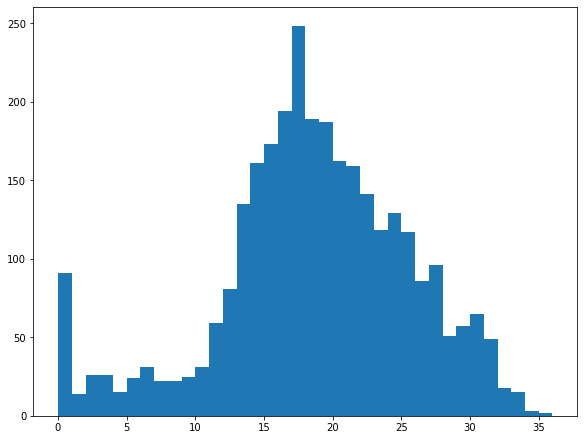

In [1]:
import math
import matplotlib.pyplot as plt

file = "../data/train_rmsd_list.txt" #

with open(file) as fh:
    rmsd_list = []
    bin_dict = {}
    rmsd_dict = {}
    for line in fh.readlines():
        name, rmsd = (line.rstrip()).split("\t")
        rmsd = float(rmsd)
        rmsd_list.append(rmsd)
        ceil = math.ceil(rmsd)
        rmsd_dict[name] = rmsd
        if ceil not in bin_dict:
            bin_dict[ceil] = [name]
        else:
            bin_dict[ceil].append(name)



fig, axs = plt.subplots(layout='constrained', figsize=(8, 6))
axs.hist(rmsd_list, bins = range(int(min(rmsd_list)), int(max(rmsd_list))+1, 1))
plt.show()

In [3]:
print(len(bin_dict[0]))
print(len(bin_dict[1]))

10
81


Number of structures in the original set:	 3025
Number of structures in the truncated set:	 945


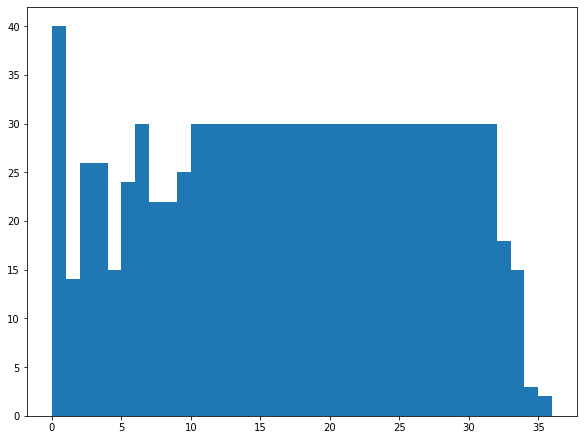

In [9]:
import random

max_nr_bins = 30

new_dict = {}
rmsd_list_new = []

for key in sorted(bin_dict):
    k = min(len(bin_dict[key]), max_nr_bins)
    new_list = random.choices(bin_dict[key], k=k)
    new_dict[key] = new_list
    for struc in new_list:
        rmsd_list_new.append(rmsd_dict[struc])

print("Number of structures in the original set:\t", len(rmsd_list))
print("Number of structures in the truncated set:\t", len(rmsd_list_new))
fig, axs = plt.subplots(layout='constrained', figsize=(8, 6))
axs.hist(rmsd_list_new, bins = range(int(min(rmsd_list_new)), int(max(rmsd_list_new))+1, 1))
plt.show()

In [10]:
new_file = "../data/truncated_train_rmsd.txt"

with open(new_file, "w") as fh:
    for key in new_dict:
        for struc in new_dict[key]:
            fh.write(str(struc) + "\t" + str(rmsd_dict[struc]) + "\n")